# Descripción del proyecto
Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

# Paso 1. Descarga los datos y prepáralos para el análisis

Descarga los datos de los restaurantes en LA. Asegúrate de que el tipo de datos para cada columna es correcto y que no hay valores ausentes o duplicados. Procésalos si es necesario.

Ruta de archivo: /datasets/rest_data_us_upd.csv. [Descargar dataset](https://practicum-content.s3.amazonaws.com/datasets/rest_data_us_upd.csv)

## Descripción de datos

**Tabla rest_data:**

- object_name — nombre del establecimiento
- chain — establecimiento que pertenece a una cadena (TRUE/FALSE)
- object_type — tipo de establecimiento
- address — dirección
- number — número de asientos

## Preparación de los datos

### Importe de librerías, creación de DataFrames y revisión preliminar de la información:

In [1]:
#Importe de librerías a usar en el desarrollo del proyecto:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from plotly import graph_objects as go


In [2]:
#Lectura de dataset como fuente de datos y creación de DataFrame a desarrollar:

df = pd.read_csv('https://practicum-content.s3.amazonaws.com/datasets/rest_data_us_upd.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Perfecto, datos y librerías cargados correctamente
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [4]:
#Revisión general de la información:

df.sample(15)

,id,object_name,address,chain,object_type,number
3324,15110,BANQUET KITCHEN,135 N GRAND AVE,False,Restaurant,185
8592,20378,BURGER KING #06023,7201 S FIGUEROA AVE,True,Fast Food,81
7431,19217,FEAST FROM THE EAST,1949 WESTWOOD BLVD,False,Restaurant,33
1668,13454,THE TRAILS,2333 FERN DELL DR,False,Restaurant,21
1040,12826,THE BOWERY,1234 W 7TH ST,False,Restaurant,32
6397,18183,EAST WEST CAFE,404 S FIGUEROA ST STE #402,True,Restaurant,24
7708,19494,RED MANGO YOGURT & SMOOTHIES,1011 S FIGUEROA ST #B 120,False,Restaurant,5
3389,15175,WILSHIRE COUNTRY CLUB,301 N ROSSMORE AVE,False,Restaurant,192
1472,13258,WOODY'S BAR-B-Q,3446 W SLAUSON AVE,False,Bar,2
2781,14567,SHAWARMA LAND,10821 VENICE BLVD,False,Restaurant,41


El dataset **rest_data_us_upd** almacenado ahora en el DataFrame **df** contiene 9651 registros con 6 columnas, de las cuales sólo 2 son del tipo entero y el resto son de tipo object. existen solamente 3 registros con datos nulos en la columna 'chain'

Para mejorar la calidad de la información este dataset será estandarizado con:

- Serán revisados los registros con datos nulos. Reemplazados y/o eliminados en caso que la cantidad no sea representativa para el análisis del dataset.
- Se revisarán los datos duplicados.
- La columnas tipo 'Object' será modificada a tipo 'Category' para obtener un [mejor procesamiento de los datos](https://pfr.com.ar/dtypes/).



#### Revisión y tratamiento de datos nulos:

In [5]:
#Revisión de datos nulos en df:

df_null_data = df.isnull().sum()

df_null_data


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [6]:
# Revisión de los restaurantes con el dato nulo en 'chain':

null_data_chain = df[df['chain'].isnull()]

display(null_data_chain) # ---> Revisión del dataframe filtrado con los datos nulos en chain

print('El porcentaje de datos nulos respecto a la cantidad de registros es del:', (len(null_data_chain)/len(df)*100), '%')

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


El porcentaje de datos nulos respecto a la cantidad de registros es del: 0.031084861672365557 %


Dado el hecho que la cantidad de registros nulos representa menos del 0,05 % de los datos, serán descartados del estudio completo del dataframe.

In [7]:
# Eliminación de datos nulos de 'chain':

df = df.dropna()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 527.6+ KB


#### Revisión y tratamiento de datos duplicados:

In [9]:
#Revisión de datos duplicados en df:

df_duplicated_data = df.duplicated().sum()

print(df_duplicated_data)

0


No existen registros duplicados en el dataset **rest_data_us_upd**. Serán revisadas aquellas columnas que NO deberían tener datos duplicados. En este caso las columnas: 'id' y 'object_name'. Esto debido a que:

1. No deben existir números de id repetidos.
2. Si existen datos duplicados en los nombres, pueden pertenecer a una franquicia, pero los números de id deben ser distintos.

In [10]:
# Revisión de datos duplicados en 'id':

df_duplicated_data_id = df['id'].duplicated()

print(df_duplicated_data_id.value_counts())

id
False    9648
Name: count, dtype: int64


No existen números de 'id' repetidos. Todos son únicos.

In [11]:
# Revisión de datos duplicados en 'object_name':

df_duplicated_data_names = df['object_name'].duplicated()

print(df_duplicated_data_names.value_counts())

object_name
False    8669
True      979
Name: count, dtype: int64


En este caso existen 979 registros que tienen el mismo nombre. Debemos corroborar que correspondan a una cadena.

In [12]:
filtered_duplicated_names = df[df['object_name'].duplicated(keep=False)].sort_values(by='object_name') # ---> Filtro de los datos duplicados con el primer registro incluido.

display(filtered_duplicated_names) 

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
4497,16283,ABC DONUTS,4555 E 3RD ST 1A,True,Fast Food,21
4569,16355,ACA GRILL,3062 W 8TH ST,True,Restaurant,25
2874,14660,ACA GRILL,1300 S SAN PEDRO ST STE 220,True,Restaurant,118
128,11914,ADMIRALS CLUB,500 WORLD WAY,False,Restaurant,205
...,...,...,...,...,...,...
3414,15200,Z PIZZA,5933 W CENTURY BLVD STE C,True,Pizza,31
6957,18743,Z PIZZA,123 N LARCHMONT BLVD,True,Pizza,48
6943,18729,Z PIZZA,2664 N GRIFFITH PARK BLVD,True,Pizza,44
106,11892,ZANKOU CHICKEN,7851 W SUNSET BLVD,True,Restaurant,40


Como podemos ver hay datos que están duplicados pero que no corresponden a una cadena.

In [13]:
#Ahora revisaremos aquellos negocios cuyo nombre sea el mismo pero que no correspondan a una cadena:

filtered_duplicated_names[filtered_duplicated_names['chain'] == False]

,id,object_name,address,chain,object_type,number
128,11914,ADMIRALS CLUB,500 WORLD WAY,False,Restaurant,205
107,11893,ADMIRALS CLUB,400 WORLD WAY,False,Restaurant,118
104,11890,BARNEY'S BEANERY,200 WORLD WAY 240,False,Bar,75
7595,19381,BARNEY'S BEANERY,1037 BROXTON AVE,False,Bar,34
1599,13385,BBQ EXPRESS,600 ALVARADO ST,False,Fast Food,45
...,...,...,...,...,...,...
7712,19498,THE TWIN DRAGON,8647 W PICO BLVD,False,Restaurant,14
3944,15730,THE TWIN DRAGON,8597 W PICO BLVD,False,Restaurant,120
4433,16219,VIVA TACOS LA ESTRELLA,6103 N FIGUEROA ST,False,Fast Food,7
1746,13532,VIVA TACOS LA ESTRELLA,3733 1/2 N MISSION RD,False,Fast Food,13


Como se puede observar, existen 62 negocios que tienen el mismo nombre, que no son una cadena. Pero como hemos comprobado antes, no tienen un mismo id. Es probable que las leyes sean flexibles frente al hecho que los negocios tengan un mismo nombre, o pueden pertenecer a un mismo dueño sin necesidad de estar registrados como una franquicia/cadena.

#### Optimización de Object a Category

In [14]:
# Transformación de columnas tipo Object a Category:

df['object_name'] = df['object_name'].astype("category") #---> Transformación al tipo category de la columna 'object_name'

df['address'] = df['address'].astype("category") #---> Transformación al tipo category de la columna 'address'

df['chain'] = df['chain'].astype("category") #---> Transformación al tipo category de la columna 'chain'

df['object_type'] = df['object_type'].astype("category") #---> Transformación al tipo category de la columna 'object_type'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9648 non-null   int64   
 1   object_name  9648 non-null   category
 2   address      9648 non-null   category
 3   chain        9648 non-null   category
 4   object_type  9648 non-null   category
 5   number       9648 non-null   int64   
dtypes: category(4), int64(2)
memory usage: 933.2 KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Bien hecho el tratamiento de tus datos previo al análisis
</div>

# Paso 2. Análisis de datos

## Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [16]:
# Procedemos a calcular los tipos de establecimiento en porcentajes:

stablishments_proportion = (df['object_type'].value_counts() / df['object_type'].count()) * 100  #---> Cálculo de la proporción de establecimientos del total existente

stablishments_proportion = stablishments_proportion.reset_index()

stablishments_proportion.columns = ['stablishment_type', 'percentage']

In [17]:
df['object_type'].value_counts(normalize=True)

object_type
Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: proportion, dtype: float64

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo, otra forma más rápida de obtener los porcentajes es en el value_counts() especificar `normalize=True` y esto te dará el resultado en valores de 0 a 1, donde 1 es 100%. Ejemplo:
    
```Python
df['object_type'].value_counts(normalize=True)
```
    
Y tendrás un resultado cómo el siguiente:
```
Restaurant    0.751762
Fast Food     0.110489
Cafe          0.045087
Pizza         0.033064
Bar           0.030265
Bakery        0.029333
Name: object_type, dtype: float64
```
</div>

In [18]:
display(stablishments_proportion)

fig = px.bar(stablishments_proportion, y='stablishment_type', x='percentage', color='stablishment_type', orientation='h', title='Proporción por tipo de establecimiento') 

fig.show()

,stablishment_type,percentage
0,Restaurant,75.176202
1,Fast Food,11.048922
2,Cafe,4.508706
3,Pizza,3.306385
4,Bar,3.026534
5,Bakery,2.933250


Los establecimiento tipo restaurante son los que acaparan gran parte del dataset con una proporción superior al 75%. Le siguen las comidas rápidas (11%) y los establecimientos tipo Café/Cafeterías (4.5%)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Correcto! Se puede visualizar y comparar las proporciones
</div>

## Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

In [19]:
chain_proportion = (df['chain'].value_counts() / df['chain'].count()) * 100 #---> Cálculo de la proporción de establecimientos que pertenecen o no a una cadena del total existente

chain_proportion = chain_proportion.reset_index()

chain_proportion.columns = ['chain', 'percentage']

In [20]:
display(chain_proportion)

fig = px.pie(chain_proportion, values='percentage', names={'false':'No','true':'Yes'}, 
             title='Proporción de establecimientos que pertenecen o no a una cadena',
             hole=0.6)     


fig.show()

,chain,percentage
0,False,61.898839
1,True,38.101161


Cerca del 62% de los establecimientos NO pertenecen a una cadena, mientras que el 38% restante sí.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo y la visualización!
</div>

## ¿Qué tipo de establecimiento es habitualmente una cadena?

In [21]:
# Inicialmente necesitaremos los datos de establecimientos que pertenecen a una cadena:

chain_data = df[df['chain'] == True]
chain_data.info()
print()
print(len(chain_data), 'Establecimientos en total pertenecen a una cadena')

<class 'pandas.core.frame.DataFrame'>
Index: 3676 entries, 8 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           3676 non-null   int64   
 1   object_name  3676 non-null   category
 2   address      3676 non-null   category
 3   chain        3676 non-null   category
 4   object_type  3676 non-null   category
 5   number       3676 non-null   int64   
dtypes: category(4), int64(2)
memory usage: 758.3 KB

3676 Establecimientos en total pertenecen a una cadena


In [22]:
# Ahora calcularemos los tipos de establecimiento en su proporción del total de cadenas existentes:

chain_data_per_stablishment = (chain_data['object_type'].value_counts() / chain_data['object_type'].count()) * 100
chain_data_per_stablishment = chain_data_per_stablishment.reset_index()
chain_data_per_stablishment.columns = ['chain_stablishments', 'percentage']

In [23]:
display(chain_data_per_stablishment)


fig = px.bar(chain_data_per_stablishment, y='chain_stablishments', x='percentage', color='chain_stablishments', orientation='h', title='Tipo de establecimiento que pertenecen a una cadena')
fig.show()

,chain_stablishments,percentage
0,Restaurant,62.350381
1,Fast Food,16.458107
2,Bakery,7.698585
3,Cafe,7.236126
4,Pizza,4.162133
5,Bar,2.094668


De los 3676 establecimientos que pertenecen a una cadena, los restaurantes lideran la representación con un 62% de la proporción, seguido de las Comidas Rápidas con un 16.5% de la representación y Panaderías con un 7.7%.

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [24]:
# Nuevamente usamos el dataframe chain_data:

seats = chain_data['number'].value_counts().reset_index()
seats.sort_values(by='number', ascending=True)

,number,count
8,1,77
19,2,72
2,3,84
18,4,73
23,5,69
...,...,...
165,225,2
193,226,1
150,227,2
181,228,1


El número máximo de asientos en los establecimientos de cadenas es de 229 sillas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


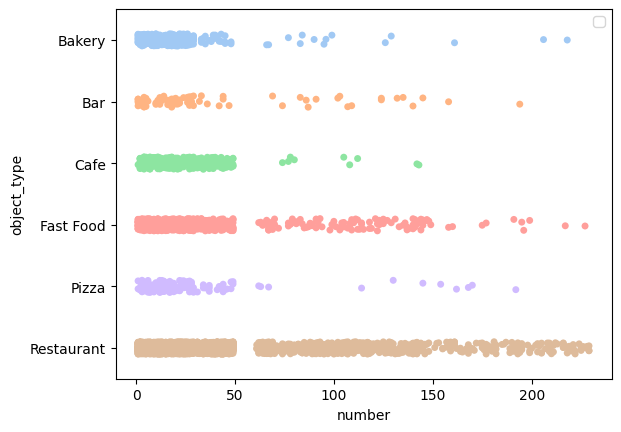

In [25]:
# Análisis gráfico: Gráfico de dispersión por sillas en establecimientos de cadena

sns.stripplot(x='number', y='object_type', data=chain_data, hue='object_type', palette='pastel')
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Parece que hay un error con el parámetro legend, te recomiendo manejar la parte de los legends desde pyplot con plt.legend()
</div>

<div class="alert alert-block alert-info">
<b>Se corrige y se hace uso de plt.legend() <b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo
</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


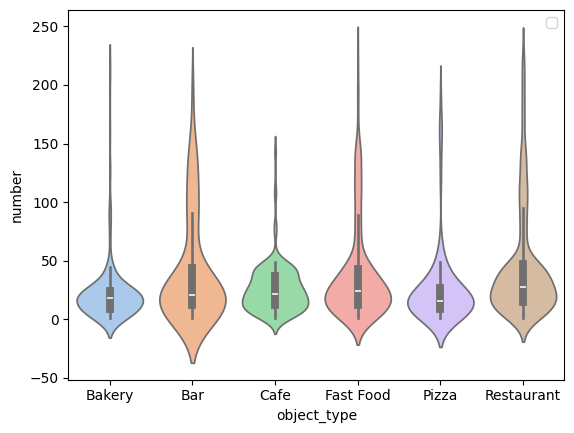

In [26]:
# Análisis gráfico: Gráfico de violines por sillas en establecimientos de cadena

sns.violinplot(x="object_type", y="number", hue='object_type', data=chain_data, palette='pastel')
plt.legend()
plt.show()

In [27]:
# Para corroborar la información obtendremos los percentiles de los datos:

print(chain_data['number'].describe())

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64


In [28]:
print(chain_data['number'].quantile([.90, .95, .99]))

0.90    107.00
0.95    140.00
0.99    206.25
Name: number, dtype: float64


En promedio los establecimientos de cadena usan 40 sillas, y el 75% usa 44 sillas o menos. También es de notar que el 90% de los establecimientos de cadena usa 107 sillas o menos, el 5% usa 140 sillas o más y sólo el 1% de los establecimientos tiene 206 sillas o más en sus instalaciones; por lo tanto las cadenas se caracterizan por pocos establecimientos con muchas sillas y la gran mayoría (el 90%) usa menos de 107 sillas en sus instalaciones.

## Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [29]:
df_avg_seats = df.groupby('object_type')['number'].mean().reset_index()
df_avg_seats.columns = ['stablishment_type', 'avg_number_of_seats']
df_avg_seats = df_avg_seats.sort_values(by='avg_number_of_seats', ascending=False)

display(df_avg_seats)

C:\Users\c_ort\AppData\Local\Temp\ipykernel_31136\3319224087.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,stablishment_type,avg_number_of_seats
5,Restaurant,48.048807
1,Bar,44.767123
3,Fast Food,31.837711
4,Pizza,28.545455
2,Cafe,25.000000
0,Bakery,21.773852


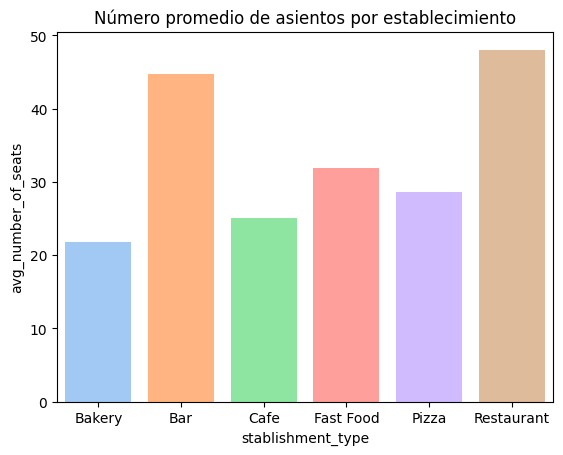

In [30]:

sns.barplot(data=df_avg_seats, x="stablishment_type", y="avg_number_of_seats", hue='stablishment_type', palette='pastel', saturation = 1.0)
plt.title('Número promedio de asientos por establecimiento')
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Este error suele ocurrir cuando seaborn no logra interpretar bien las columnas en el DataFrame, te recomiendo siempre especificar que el dataframe va a ser de donde se deben tomar los datos con el parámetro `data`, es decir, `data=df_avg_seats`
</div>

<div class="alert alert-block alert-info">
<b>Se corrige y se hace uso de data=df_avg_seats <b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo
</div>

Los restaurantes son los que en promedio tienen mayor número de asientos en sus instalaciones (48 sillas en promedio por establecimiento).

## Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [31]:
# Inicialmente veremos la estructura de df['address']:

df['address'].sample(15)

8704              4216 MELROSE AVE
344             5214 W SUNSET BLVD
5894             10955 KINROSS AVE
6267              9575 W PICO BLVD
3651    621 S WESTERN AVE STE #301
4159            4520 W SUNSET BLVD
9509              1689 EASTERN AVE
7561             10701 VENICE BLVD
7541            2904 S FIGUEROA ST
7458            1253 N VINE ST #12
5709     2217 E CESAR E CHAVEZ AVE
2448             11328 VERMONT AVE
9409       3424 WILSHIRE BLVD MEZZ
9222         450 S WESTERN AVE FC4
9045            1090 WILSHIRE BLVD
Name: address, dtype: category
Categories (8509, object): ['00936 S MAPLE AVE 17', '01253 N VINE ST #7A', '03742 S FLOWER ST', '05358 WILSHIRE BLVD', ..., 'OLVERA ST 5', 'OLVERA ST E17', 'OLVERA ST E8', 'OLVERA ST W17']

En este caso se observa que la estructura de las direcciones se compone inicialmente en un número y posteriormente en texto (a veces acompañado de números)

In [32]:
# Teniendo en cuenta la observación anterior, se procede a crear una nueva columna que almacene los nombres de las calles:

df['street_name'] = df['address'].apply(lambda x: ' '.join(x.split()[1:]))

In [33]:
df.sample(15)

,id,object_name,address,chain,object_type,number,street_name
6226,18012,IPIC THEATER,10840 WILSHIRE BLVD,False,Restaurant,178,WILSHIRE BLVD
4178,15964,YANG BAN SUL LUNG TANG INC,1515 MAPLE AVE STE 1,False,Restaurant,48,MAPLE AVE STE 1
2830,14616,LA MAYORDOMIA,5892 S BROADWAY,False,Restaurant,5,S BROADWAY
8488,20274,TACOS TU MADRE,1824 N VERMONT AVE,True,Fast Food,22,N VERMONT AVE
6718,18504,GUISADOS,1261 W SUNSET BLVD,True,Restaurant,77,W SUNSET BLVD
9418,21204,JACK IN THE BOX # 228,805 MANCHESTER AVE,True,Restaurant,45,MANCHESTER AVE
9073,20859,SHAKE SHACK,10250 SANTA MONICA BLVD 202,True,Restaurant,76,SANTA MONICA BLVD 202
3541,15327,LA FAMOSITA BAKERY,5116 S CENTRAL AVE,True,Bakery,25,S CENTRAL AVE
6550,18336,CLEO,1717 N VINE ST,True,Restaurant,138,N VINE ST
8400,20186,MARU COFFEE,1019 S SANTA FE AVE,True,Cafe,16,S SANTA FE AVE


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo!
</div>

## Traza un gráfico de las diez mejores calles por número de restaurantes.

,street_name,stablishments_per_street
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


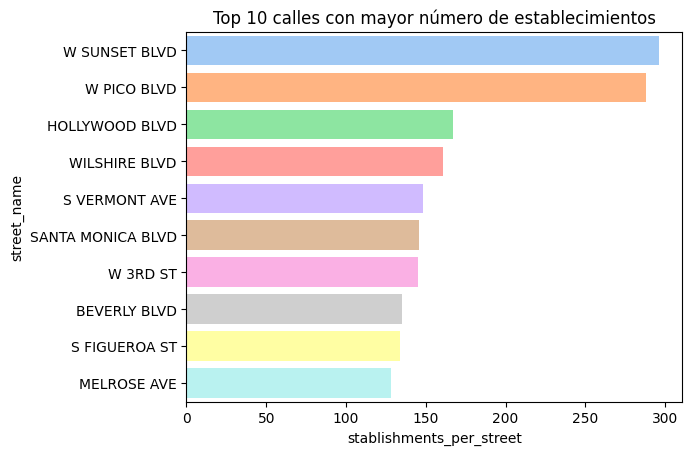

In [35]:
# Cálculo del top 10 de calles por número de establecimientos:

stablishments_per_street = df.groupby('street_name')['object_name'].count().reset_index()
stablishments_per_street.columns = ['street_name', 'stablishments_per_street']
top_10_streets_stablishment = stablishments_per_street.sort_values(by='stablishments_per_street', ascending=False)[:10].reset_index(drop=True)

display(top_10_streets_stablishment)


# Gráfico de Top 10 calles con mayor número de establecimientos:
sns.barplot(data=top_10_streets_stablishment, x="stablishments_per_street", y="street_name", hue='street_name', legend=False, palette='pastel', saturation = 1.0)
plt.title('Top 10 calles con mayor número de establecimientos')
plt.show()

Las calles que más establecimientos tienen son: W SUNSET BLVD (con 296 establecimientos), W PICO BLVD (288 establecimientos), HOLLYWOOD BLVD (167 establecimientos).

## Encuentra el número de calles que solo tienen un restaurante.

In [36]:
# Reutilizamos el dataframe stablishments_per_street:

one_stablishment_per_street = stablishments_per_street[stablishments_per_street['stablishments_per_street'] == 1]

print('Calles con un solo restaurante:', one_stablishment_per_street['stablishments_per_street'].count())

Calles con un solo restaurante: 2445


## Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

                   count       mean        std  min    25%   50%    75%    max
street_name                                                                   
BEVERLY BLVD       135.0  44.770370  43.946362  1.0  17.00  29.0  48.00  218.0
HOLLYWOOD BLVD     167.0  53.730539  53.512912  1.0  17.00  36.0  66.00  229.0
MELROSE AVE        128.0  52.429688  47.245828  1.0  16.75  38.5  90.00  222.0
S FIGUEROA ST      134.0  50.761194  51.254661  3.0  17.00  28.0  70.00  226.0
S VERMONT AVE      148.0  45.878378  50.974571  1.0  16.25  27.0  47.00  227.0
SANTA MONICA BLVD  146.0  32.390411  32.665995  1.0  12.00  24.0  40.75  185.0
W 3RD ST           145.0  43.931034  41.219038  1.0  16.00  31.0  47.00  161.0
W PICO BLVD        288.0  40.878472  41.772352  1.0  13.00  27.0  45.00  205.0
W SUNSET BLVD      296.0  50.918919  50.484502  1.0  17.00  35.0  66.25  229.0
WILSHIRE BLVD      161.0  62.130435  57.475879  3.0  22.00  40.0  93.00  229.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


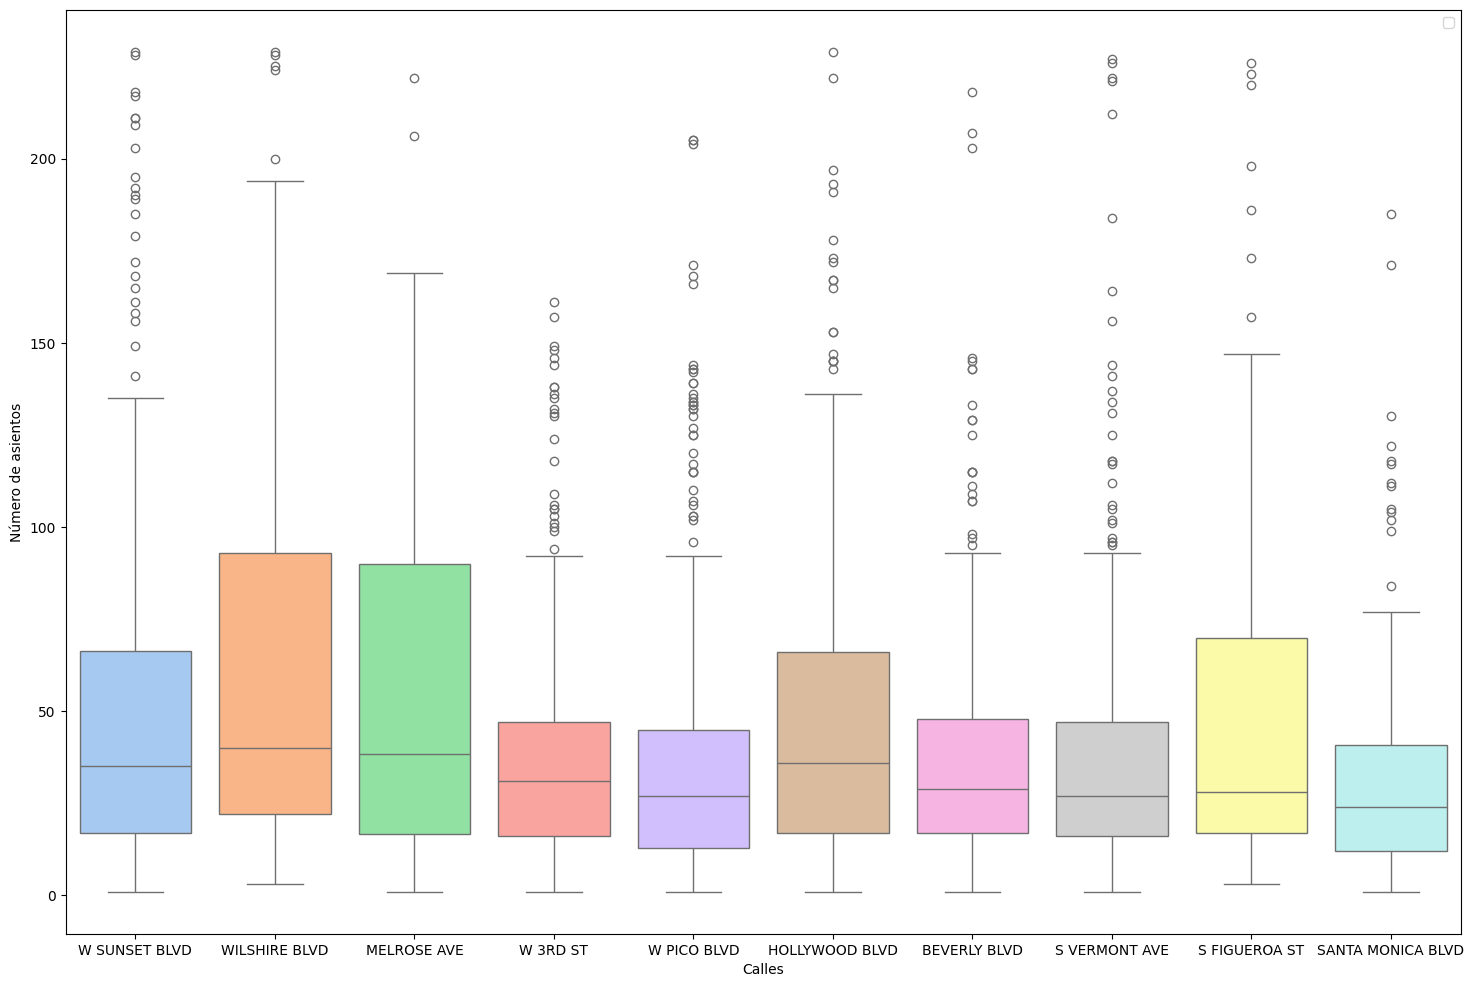

In [37]:
# Inicialmente filtramos aquellas calles que coincidan con los nombres de las calles que pertenecen al top 10:
top_10_streets_filter = df[df['street_name'].isin(top_10_streets_stablishment['street_name'])]


# Descripción estadística de los asientos por calle:
top_10_streets_seats_distribution = top_10_streets_filter.groupby('street_name')['number'].describe()

print(top_10_streets_seats_distribution)


# Distribución gráfica por diagrama de cajas:
plt.figure(figsize=(18,12))
sns.boxplot(x = 'street_name', y = 'number', data = top_10_streets_filter, hue='street_name',palette= 'pastel', saturation = 0.9, linewidth = 1)
plt.legend()
plt.xlabel('Calles')
plt.ylabel('Número de asientos')
plt.show()


In [38]:
# Análisis estadísticos en los cuantiles 95 y 99:
top_10_streets_filter.groupby('street_name')['number'].quantile([.95, .99])

street_name            
BEVERLY BLVD       0.95    136.00
                   0.99    205.64
HOLLYWOOD BLVD     0.95    167.00
                   0.99    205.50
MELROSE AVE        0.95    138.65
                   0.99    196.01
S FIGUEROA ST      0.95    150.50
                   0.99    222.01
S VERMONT AVE      0.95    151.80
                   0.99    224.12
SANTA MONICA BLVD  0.95    109.50
                   0.99    152.55
W 3RD ST           0.95    137.60
                   0.99    153.48
W PICO BLVD        0.95    134.00
                   0.99    175.29
W SUNSET BLVD      0.95    169.00
                   0.99    217.05
WILSHIRE BLVD      0.95    184.00
                   0.99    226.20
Name: number, dtype: float64

En este caso podemos observar que aquellas calles con mayor número de restaurantes tienen un amplio rango de sillas en sus establecimientos. Por ejemplo W SUNSET BLVD (la calle con mayor número de establecimientos) tiene en promedio 51 sillas, pero a su vez muestra datos atípicos hasta llegar a un máximo de 229 sillas por establecimiento. Lo mismo pasa con HOLLYWOOD BLVD y con WILSHIRE BLVD que llegan a tener en su haber más de 200 asientos por establecimiento. 

Se puede decir que en cada calle hay una diversidad de establecimientos que tienen variadas cantidades en sus asientos (puede intuirse que hay desde establecimientos con poca capacidad como de mucha capacidad).

## Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

Dado el panorama de los resultados descritos anteriormente podemos establecer qué:

1. Los tipos de establecimientos más populares en la ciudad son los restaurantes con un 75% de presencia, comidas rápidas con 11% mientras que los cafés ocupan un 4.5% de presencia.
2. La gran mayoría de establecimientos NO pertenece a una cadena (el 62% de los establecimientos no son cadenas). Y de aquellos establecimientos que pertenecen a una cadena, los restaurantes lideran el listado con el 62.35 % de la representación, comidas rápidas 16.5%, panaderías 7.7% y los cafés 7.23%.
3. Asumiendo que el tamaño del local va en función del número de asientos por establecimiento, los cafés tienen en promedio 25 sillas por establecimiento, mientras que los restaurantes lideran ese rubro con 48 sillas por establecimiento. Por otro lado las calles que más establecimientos contienen, tienen como rango de promedio de asientos entre 32 a 63 sillas; siendo W PICO BLVD y W SUNSET BLVD aquellas calles que se manejan en un rango de 41 a 51 sillas en promedio. Sin embargo cabe notar que como la mayoría son restaurantes son éstos los que suben el promedio de asientos por establecimiento.

Teniendo en cuenta lo anterior, podemos concluir que:

- No es recomendable que un café pertenezca a una cadena, al menos no de forma inicial, debido a que son escasas y su presencia no es representativa en los establecimientos que pertenecen a una cadena.
- Hacer presencia en los barrios con mayor número de establecimientos; como pueden ser W PICO BLVD y W SUNSET BLVD y tener un tamaño de sillas entre 40 a 50 máximo. Así estaría dentro de la media de asiento de los barrios y por encima de la media de sillas de un café (25 sillas en promedio). Dado que es un proyecto costoso, sería bueno contemplar la posibilidad de tener un espacio para ampliar un negocio a futuro (en caso que empiece a ser muy rentable) y/o crear una cadena, sin embargo, como se mencionó antes, no es recomendable hacerlo de forma inicial.


# Presentación en la nube:


<https://drive.google.com/file/d/1kKaxJ6Ntkx3wSialSlBeazbcWwAghMs6/view?usp=sharing>
